In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
with open('../data/static_11_12_23/raw/static_full.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head(1)

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_champion_championNumber,...,participant10_kills,participant10_deaths,participant10_assists,participant10_lp,participant10_maxKills,participant10_cs,participant10_damage,participant10_gold,participant10_teamId,participant10_win
0,1157,1697021737080,13.20.535.2535,11,420,20,13,BR1,988,83,...,1.4,6.5,14.7,13,12,35.8,7711.0,7655.0,200,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51361 entries, 0 to 0
Columns: 368 entries, gameDuration to participant10_win
dtypes: bool(50), float64(100), int64(176), object(42)
memory usage: 127.5+ MB


In [5]:
import os
import sys

print(os.path.dirname(sys.executable))

C:\Users\morit\AppData\Local\pypoetry\Cache\virtualenvs\leaguify-VaCbhr8h-py3.11\Scripts


In [6]:
df.describe()

,gameDuration,gameCreation,mapId,queueId,patch,seasonId,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,...,participant10_championPointsSinceLastLevel,participant10_tokensEarned,participant10_kda,participant10_kills,participant10_deaths,participant10_assists,participant10_cs,participant10_damage,participant10_gold,participant10_teamId
count,51361.000000,5.136100e+04,51361.0,51361.0,51361.0,51361.0,51361.000000,51361.000000,51361.000000,51361.000000,...,5.136100e+04,51361.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,51361.000000
mean,1650.162263,1.697649e+12,11.0,420.0,20.0,13.0,400.242752,186.252896,6.898659,5.218493,...,2.732677e+05,0.589027,3.067665,2.425476,5.365045,12.857855,36.278954,9486.585383,7837.298337,199.941590
std,341.273080,3.536481e+08,0.0,0.0,0.0,0.0,289.531495,243.310257,2.080195,1.716854,...,6.380685e+05,0.949352,1.136323,1.743632,1.512271,3.137949,31.735300,5092.518631,1345.467642,2.416135
min,960.000000,1.696979e+12,11.0,420.0,20.0,13.0,30.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000,2842.000000,100.000000
25%,1414.000000,1.697332e+12,11.0,420.0,20.0,13.0,144.000000,57.000000,6.000000,4.000000,...,6.444000e+03,0.000000,2.440000,1.300000,4.400000,11.100000,24.000000,6089.000000,6976.000000,200.000000
50%,1633.000000,1.697661e+12,11.0,420.0,20.0,13.0,356.000000,86.000000,8.000000,5.000000,...,5.993100e+04,0.000000,2.930000,1.800000,5.200000,13.100000,31.000000,7585.000000,7529.000000,200.000000
75%,1865.000000,1.697983e+12,11.0,420.0,20.0,13.0,591.000000,164.000000,8.000000,6.000000,...,2.349460e+05,2.000000,3.510000,3.000000,6.100000,14.700000,36.000000,11166.000000,8403.250000,200.000000
max,3577.000000,1.698199e+12,11.0,420.0,20.0,13.0,1872.000000,950.000000,10.000000,10.000000,...,1.204203e+07,3.000000,31.000000,24.000000,21.000000,38.000000,386.000000,68689.000000,21921.000000,200.000000


In [7]:
df.dtypes

gameDuration              int64
gameCreation              int64
gameVersion              object
mapId                     int64
queueId                   int64
                         ...   
participant10_cs        float64
participant10_damage    float64
participant10_gold      float64
participant10_teamId      int64
participant10_win          bool
Length: 368, dtype: object

<Axes: >

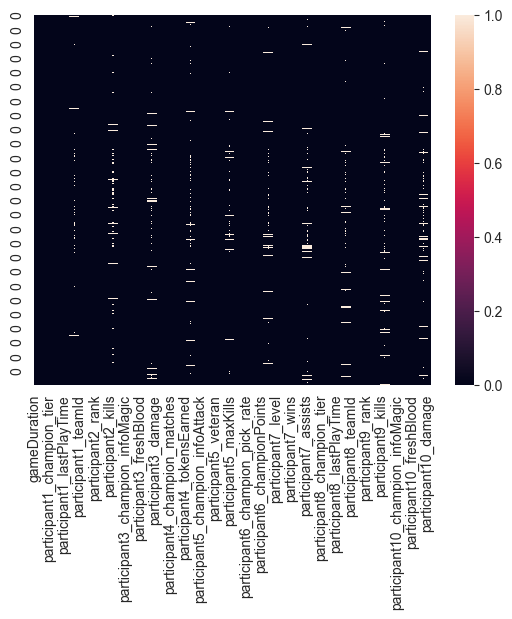

In [8]:
sns.heatmap(df.isna())

C:\Users\morit\AppData\Local\Temp\ipykernel_24696\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

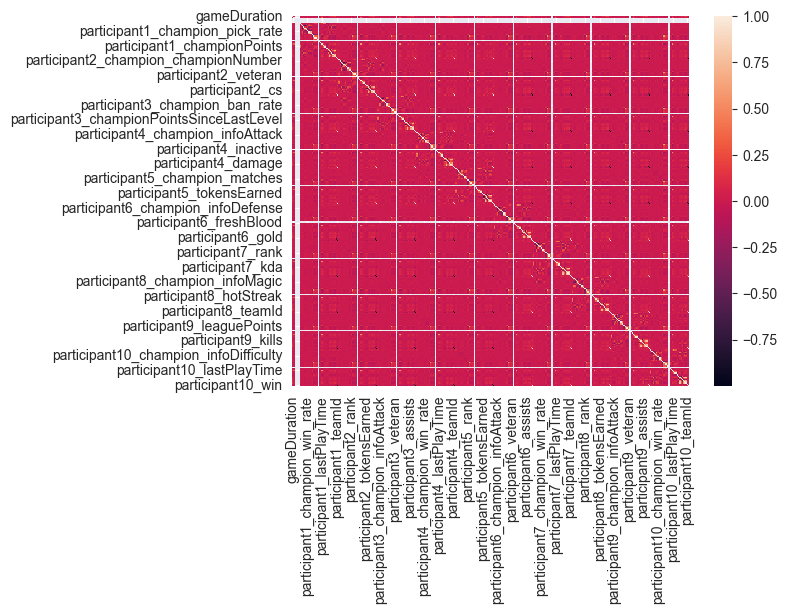

In [9]:
sns.heatmap(df.corr())

In [10]:
df.isna().sum()

gameDuration               0
gameCreation               0
gameVersion                0
mapId                      0
queueId                    0
                        ... 
participant10_cs        1585
participant10_damage    1585
participant10_gold      1585
participant10_teamId       0
participant10_win          0
Length: 368, dtype: int64

In [11]:
#currently, there are 81710 missing kda entries in the database

In [12]:
def drop_missing(df: pd.DataFrame) -> pd.DataFrame:
    len_before = len(df)
    df_new = df.dropna(axis=0)
    print(f'dropped {len_before - len(df_new)} rows')
    return df_new


def replace_missing(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.fillna(-1)
    return df_new

In [13]:
df_nomissing = drop_missing(df)
#replace_missing(df)

dropped 26260 rows


the first 5 participants are always in the same team:

In [14]:
df['participant1_win'] == df['participant2_win']

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Length: 51361, dtype: bool

In [ ]:
np.all(df['participant1_win'] == df['participant2_win'])

In [ ]:
print(len(df[df['participant1_win'] != df['participant2_win']]))
print(len(df[df['participant1_win'] != df['participant3_win']]))

In [ ]:
df.head()

In [ ]:
def get_winning_team(df: pd.DataFrame):
    df['label'] = np.where(df['participant1_win'], 0, 1)  # 0 = team1 won, 1 = team2 won 

In [ ]:
get_winning_team(df)

In [ ]:
def drop_wrong_data(df: pd.DataFrame):
    len_before = len(df)
    df.drop(df[df['mapId'] != 11].index, inplace=True)
    df.drop(df[df['queueId'] != 420].index, inplace=True)
    df.drop(df[df['gameDuration'] < 900].index, inplace=True)
    df.drop(df[df['platformId'] != 'EUW1'].index, inplace=True)
    df.drop(df[df['seasonId'] != 13].index, inplace=True)
    df.drop(df[df['gameVersion'] != df['gameVersion'][0]].index, inplace=True)
    df.drop(df[df['patch'] != df['patch'][0]].index, inplace=True)
    print(f'dropped {len_before - len(df)} rows')

In [ ]:
df

In [ ]:
drop_wrong_data(df)

In [ ]:
def drop_irrelevant(df: pd.DataFrame):
    irrelevant_cols = ['gameDuration', 'gameCreation', 'gameVersion', 'mapId', 'queueId', 'patch', 'seasonId',
                       'platformId']
    for i in range(1, 11):
        irrelevant_cols.append(f'participant{i}_win')
    df.drop(columns=irrelevant_cols, inplace=True)


In [ ]:
drop_irrelevant(df)

In [ ]:
df.reset_index(inplace=True, drop=True)
df

In [ ]:
df['participant1_tier']

In [ ]:
from enum import Enum


class Rank(Enum):
    IRON = 0
    BRONZE = 1
    SILVER = 2
    GOLD = 3
    PLATINUM = 4
    EMERALD = 5
    DIAMOND = 6
    MASTER = 7
    GRANDMASTER = 8
    CHALLENGER = 9


def format_rank(tier: str, rank: str) -> str:
    return f'{tier}.{rank}'


def fix_rank(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].apply(lambda x: Rank[x].value)
        df.loc[:, f'participant{i}_tier'] = df.apply(
            lambda x: format_rank(x[f'participant{i}_tier'], x[f'participant{i}_rank']), axis=1)
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].astype(float)
        df.drop(columns=[f'participant{i}_rank'], inplace=True)

In [ ]:
fix_rank(df)
df

In [ ]:
def calc_winrate(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_winrate'] = df[f'participant{i}_wins'] / (
                df[f'participant{i}_wins'] + df[f'participant{i}_losses'])
        df.drop(columns=[f'participant{i}_wins', f'participant{i}_losses'], inplace=True)

In [ ]:
calc_winrate(df)
df

In [ ]:
cols = df.columns.tolist()
index = cols.index('label')
cols = cols[:index] + cols[index + 1:] + [cols[index]]  # label as last column
df = df[cols]

In [ ]:
def fix_teamId(df: pd.DataFrame):
    for i in range(1, 11):
        df.loc[f'participant{i}_teamId'] = df[f'participant{i}_teamId'] // 100 - 1

In [ ]:
fix_teamId(df)
df

In [ ]:
def convert_booleans(df: pd.DataFrame):
    df.replace({True: 1, False: 0}, inplace=True)

In [ ]:
convert_booleans(df)
df

In [ ]:
from datetime import datetime


def convert_lastPlayTime(df: pd.DataFrame):
    for i in range(1, 11):
        df.loc[f'participant{i}_champion_lastPlayTime'] = df[f'participant{i}_champion_lastPlayTime'].apply(
            lambda x: int((datetime.now() - datetime.fromtimestamp(x / 1000)).total_seconds()))

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
df.isna().sum()

In [ ]:
drop_missing(df)

In [ ]:
convert_lastPlayTime(df)
df

In [ ]:
# calculate teamIds from participant_win


In [ ]:
#for i, col in enumerate(df.columns):
#   plt.figure(i)
#  sns.histplot(df[col], stat='density', kde=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42,
                                                    shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.append(X_train, np.expand_dims(y_train, axis=1), axis=1)
X_test = np.append(X_test, np.expand_dims(y_test, axis=1), axis=1)

In [ ]:
X_train

In [ ]:
np.shape(np.expand_dims(y_train, axis=1))

In [ ]:
np.shape(X_train)

In [ ]:
#np.save('../data/train_static', X_train)
#np.save('../data/test_static', X_test)